Hello again, I hope that you are not tired because I am

# Tutorial 2: Data analysis & classification


## Introduction

In this tutorial you will:
-  How to analyse data
## Let's get started!

first let us retrive the data from the prev tut

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%store -r X_imp
%store -r y
%store -r data_imp

In [4]:
print(X_imp.shape)
print(data_imp.shape)

print(y)

(3500958, 7)
(3500958, 8)
[1 0 0 ... 0 0 1]


### Questions
- Now I have a question, should I balance the data first ?
- should I import pakages as they appear, or all of them in one go

In [5]:
import numpy as np
chosen_idx = np.random.choice(3500958 , replace=False, size=5000) # this line migh be a probem, because we need to stratify
X_sample = X_imp.iloc[chosen_idx]
data_sample = data_imp.iloc[chosen_idx]


In [6]:
print(X_sample.shape)
print(data_sample.shape)

(5000, 7)
(5000, 8)


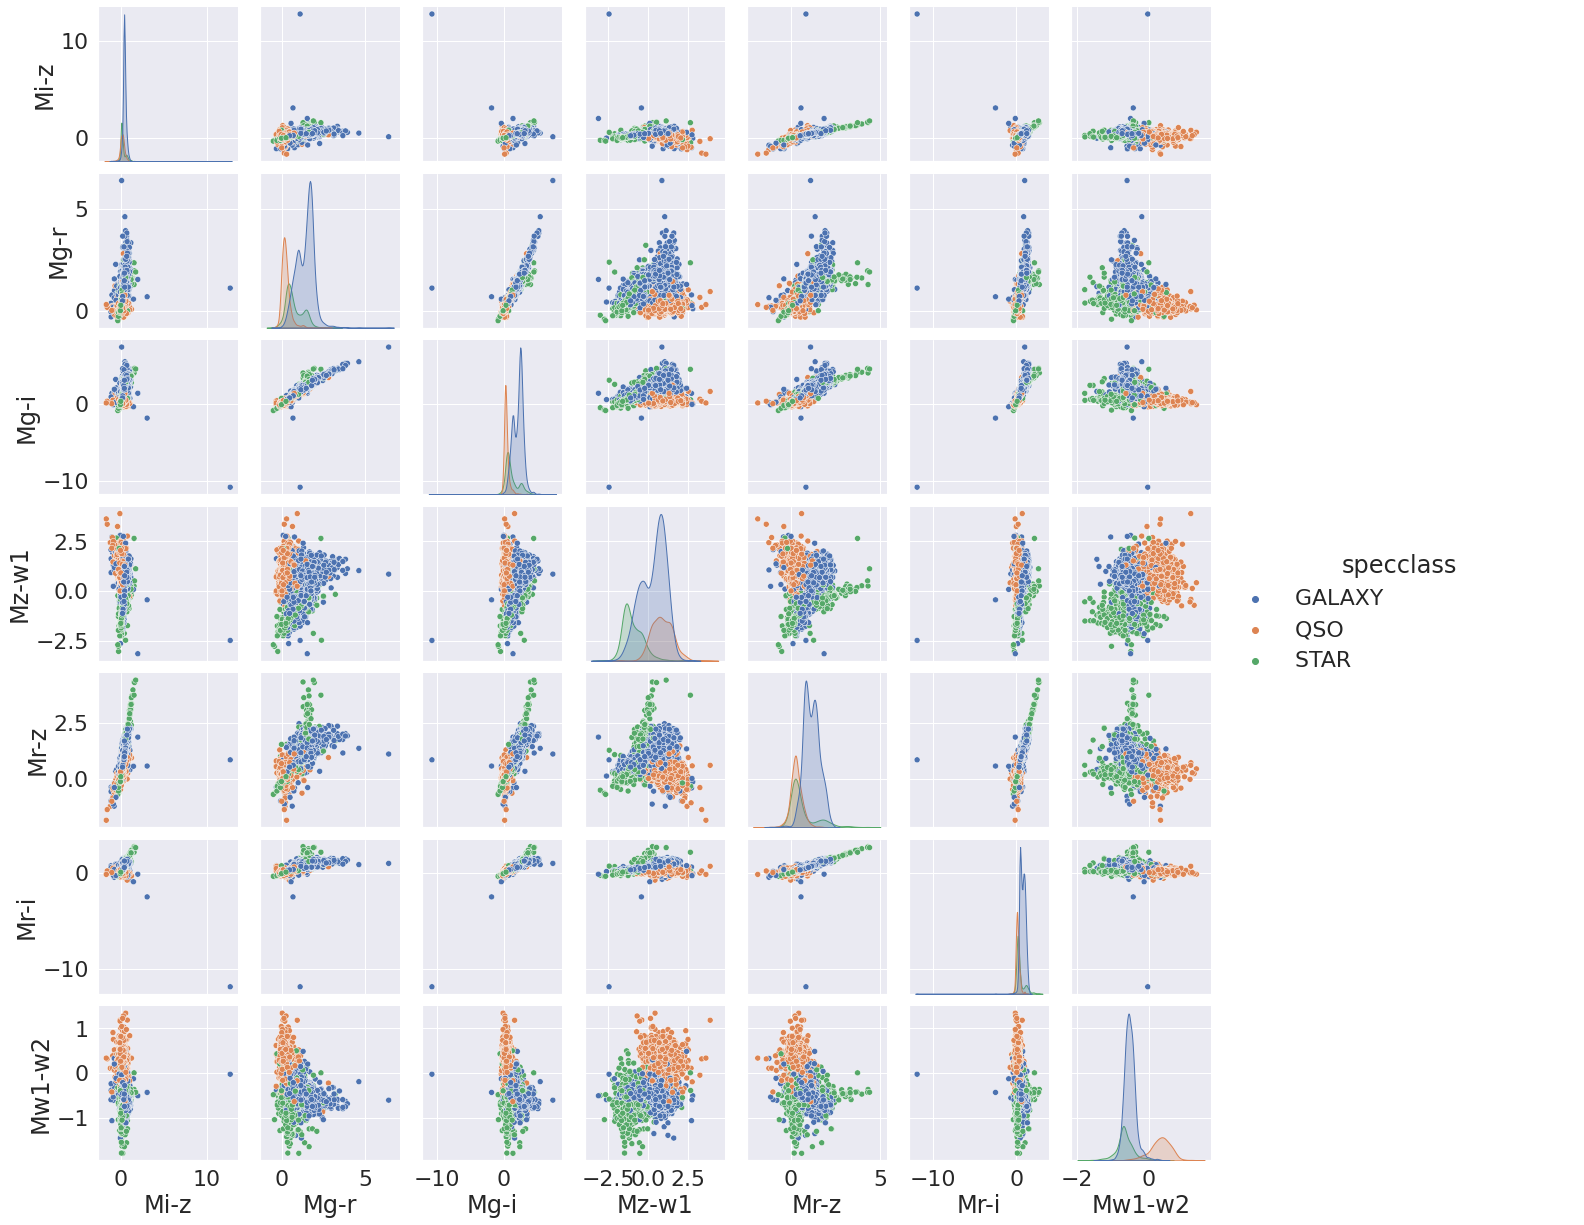

In [7]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(data_sample, hue="specclass")

## Classification

The next sextion will just show how to make a classifier using random forest (RF) and logistic regression (LR), we should use the same split that was used in the prevoius tut.

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( X_imp, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets


In [10]:
print(Xtrain.shape)
print(Xtest.shape)

(2100574, 7)
(1400384, 7)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *


### RF

In [12]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(Xtrain, Ytrain) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    858209
           1       0.96      0.96      0.96    275974
           2       0.96      0.93      0.95    266201

    accuracy                           0.97   1400384
   macro avg       0.96      0.96      0.96   1400384
weighted avg       0.97      0.97      0.97   1400384

Matrix
[[839936   8866   9407]
 [ 10931 263780   1263]
 [ 15261   2548 248392]]

0.9655265984187195


### LR

In [13]:
model = LogisticRegression(n_jobs = -1)
model.fit(Xtrain, Ytrain) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()

Classification
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    858209
           1       0.94      0.94      0.94    275974
           2       0.79      0.69      0.74    266201

    accuracy                           0.89   1400384
   macro avg       0.88      0.85      0.86   1400384
weighted avg       0.88      0.89      0.88   1400384

Matrix
[[797453  11869  48887]
 [ 16115 259634    225]
 [ 79374   3584 183243]]



### Should I show the following part ?

### Now the Question should we balance the data, by downsampling. ? ?  ? ? ?  ? ? ? ? ? ? ? ? ? ? ? 
- since the training is taking some time we will have to downsampling
- Downsampling will also give participants the chance to test more, and be more creative
- but the total time is about 5 min ? so I need to think again

let us just try it, shall we
 - #@ we are only doing downsampling on the trainig data. 

In [18]:
Xtrain['y_tr'] = Ytrain # comine the features with the target so we can downsample easier.
train = Xtrain
print(train.head(2))

         modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z  \
318477    21.733627   21.470362   21.289051   21.259430   21.162010   
2541929   20.833117   19.358204   18.756538   18.532005   18.394157   

          W1mproPM   W2mproPM      Mu-g      Mu-r      Mu-i  ...     Mg-w1  \
318477   19.573001  19.401000  0.263266  0.444576  0.474197  ...  1.897361   
2541929  19.660000  20.911001  1.474913  2.076578  2.301111  ... -0.301797   

            Mg-w2     Mr-w1     Mr-w2     Mi-w1     Mi-w2     Mz-w1     Mz-w2  \
318477   2.069361  1.716051  1.888051  1.686429  1.858430  1.589010  1.761010   
2541929 -1.552797 -0.903462 -2.154462 -1.127995 -2.378995 -1.265843 -2.516843   

         Mw1-w2  y_tr  
318477    0.172     1  
2541929  -1.251     2  

[2 rows x 29 columns]


In [27]:
stars_tr = train[train["y_tr"] == 2]
galaxies_tr  = train[train["y_tr"] == 0]
qsr_tr = train[train["y_tr"] == 1]

In [28]:
print(stars_tr.shape)
print(galaxies_tr.shape)
print(qsr_tr.shape)

(399302, 29)
(399302, 29)
(399302, 29)


In [29]:
from sklearn.utils import resample
galaxies_downsample = resample(galaxies_tr,
             replace=True,
             n_samples=len(stars_tr),
             random_state=42)

print(galaxies_downsample.shape)

qsrs_downsample = resample(qsr_tr,
             replace=True,
             n_samples=len(stars_tr),
             random_state=42)

print(qsrs_downsample.shape)

(399302, 29)
(399302, 29)


now join every thing, then split the target from the features, then retrain. 

In [30]:
trainArr = [stars_tr, galaxies_downsample, qsrs_downsample]
train = pd.concat(trainArr, ignore_index=True)

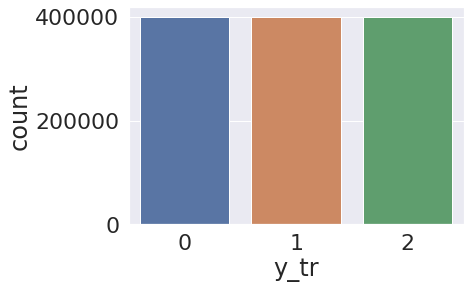

In [31]:
ax = sns.countplot(x="y_tr",data=train)


In [32]:
from sklearn.utils import shuffle
train = shuffle(train, random_state=20) # we have to shuffle the data, to avoid overfitting
yTrain = train[["y_tr"]]
xTrain = train.drop(['y_tr'], axis = 1)


In [35]:
print(yTrain.head(10))
# print(xTrain.head(2))

         y_tr
1150977     1
925186      1
910953      1
517496      0
423847      0
93938       2
152260      2
612299      0
124761      2
84217       2


In [36]:
print(xTrain.shape)
print(yTrain.shape)
print(399302*3)

(1197906, 28)
(1197906, 1)
1197906


### RF on the balanced data

In [37]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(xTrain, np.array(yTrain).flatten()) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    858209
           1       0.95      0.97      0.96    275974
           2       0.93      0.97      0.95    266201

    accuracy                           0.97   1400384
   macro avg       0.96      0.97      0.96   1400384
weighted avg       0.97      0.97      0.97   1400384

Matrix
[[828843  12108  17258]
 [  6110 267950   1914]
 [  4729   2030 259442]]

0.9684736472281888


### LR on the balanced data

In [38]:
model = LogisticRegression(n_jobs = -1)
model.fit(xTrain, np.array(yTrain).flatten()) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()

Classification
              precision    recall  f1-score   support

           0       0.95      0.80      0.87    858209
           1       0.91      0.96      0.93    275974
           2       0.61      0.88      0.72    266201

    accuracy                           0.85   1400384
   macro avg       0.82      0.88      0.84   1400384
weighted avg       0.88      0.85      0.85   1400384

Matrix
[[688788  20909 148512]
 [ 10303 264744    927]
 [ 27036   5132 234033]]

